In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

# REMERGE (Kumaran & McClelland 2012)
### Kumaran, D., & McClelland, J. L. (2012). Generalization through the recurrent interaction of episodic memories: a model of the hippocampal system. Psychological review, 119(3), 573.

In [2]:
# parameters used for "good" subjects
weight = 1.52
temperature = 0.4
C = 1
lbda = 0.2
beta = 0.15
iters = 150

In [3]:
feature_labels = ["a", "b", "c", "x", "y", "z"]
conjunctive_labels = ["ab", "bc", "xy", "yz"]
all_labels = feature_labels + conjunctive_labels

activations = {}
activations_prev = {}

net_inp_prev = {}

def hedged_softmax(conjunctive_activities, temper):
    denom = 0.0
    denom += C**(1/temper)
    for activity in conjunctive_activities:
        denom += np.exp(activity / temper)
    return np.exp(conjunctive_activities / temper) / denom

def logistic(activity, temper):
    output = 1.0 / (1.0 + np.exp(- activity  / temper))
    return output
            
# activity initialization
for label in all_labels:
    activations[label] = 0.0
    net_inp_prev[label]  = 0.0

# input initialization
vec_in = {"a":1.0, "b":0.0, "c":0.0, "x":0.0, "y":0.0, "z":0.0}
for label in vec_in:
    activations[label] = vec_in[label]
    net_inp_prev[label] = vec_in[label]
    
activations_prev = activations

a = []
b = []
c = []
x = []
y = []
z = []

ab = []
bc = []
xy = []
yz = []

a.append(copy.copy(activations['a']))
b.append(copy.copy(activations['b']))
c.append(copy.copy(activations['c']))
x.append(copy.copy(activations['x']))
y.append(copy.copy(activations['y']))
z.append(copy.copy(activations['z']))

ab.append(copy.copy(activations['ab']))
bc.append(copy.copy(activations['bc']))
xy.append(copy.copy(activations['xy']))
yz.append(copy.copy(activations['yz']))

cycles = [0]

for i in range(iters):
    
    cycles.append(i+1)
    
    conjunctive_activities = []
    labels = []

    # update conjunctive unit activations
    for conjunctive in conjunctive_labels:
    
        labels.append(conjunctive)
        inputs = []
    
        for feature in feature_labels:
            if feature in conjunctive:
                inputs.append(activations_prev[feature])
                
        current_input = 0.0
    
        for inp in inputs:
            current_input += weight * inp
        
        net_input = lbda * current_input + (1 - lbda) * net_inp_prev[conjunctive]
        conjunctive_activities.append(net_input)
        
        net_inp_prev[conjunctive] = net_input
        
    conjunctive_activities = np.asarray(conjunctive_activities)
    conjunctive_activities = hedged_softmax(conjunctive_activities, temperature)
    
    for i, label in enumerate(labels):
        activations[label] = conjunctive_activities[i]
        
    # update feature activations
    for feature in feature_labels:
        
        current_input = 0.0
    
        for conjunctive in conjunctive_labels:
            if feature in conjunctive:
                current_input += activations_prev[conjunctive] * weight
                
        current_input += vec_in[feature]
        
        net_input = lbda * current_input + (1 - lbda) * net_inp_prev[feature]
        
        activations[feature] = logistic(net_input, temperature)
        net_inp_prev[feature] = net_input

    activations_prev = copy.copy(activations)
    
    a.append(copy.copy(activations['a']))
    b.append(copy.copy(activations['b']))
    c.append(copy.copy(activations['c']))
    x.append(copy.copy(activations['x']))
    y.append(copy.copy(activations['y']))
    z.append(copy.copy(activations['z']))
    
    ab.append(copy.copy(activations['ab']))
    bc.append(copy.copy(activations['bc']))
    xy.append(copy.copy(activations['xy']))
    yz.append(copy.copy(activations['yz']))

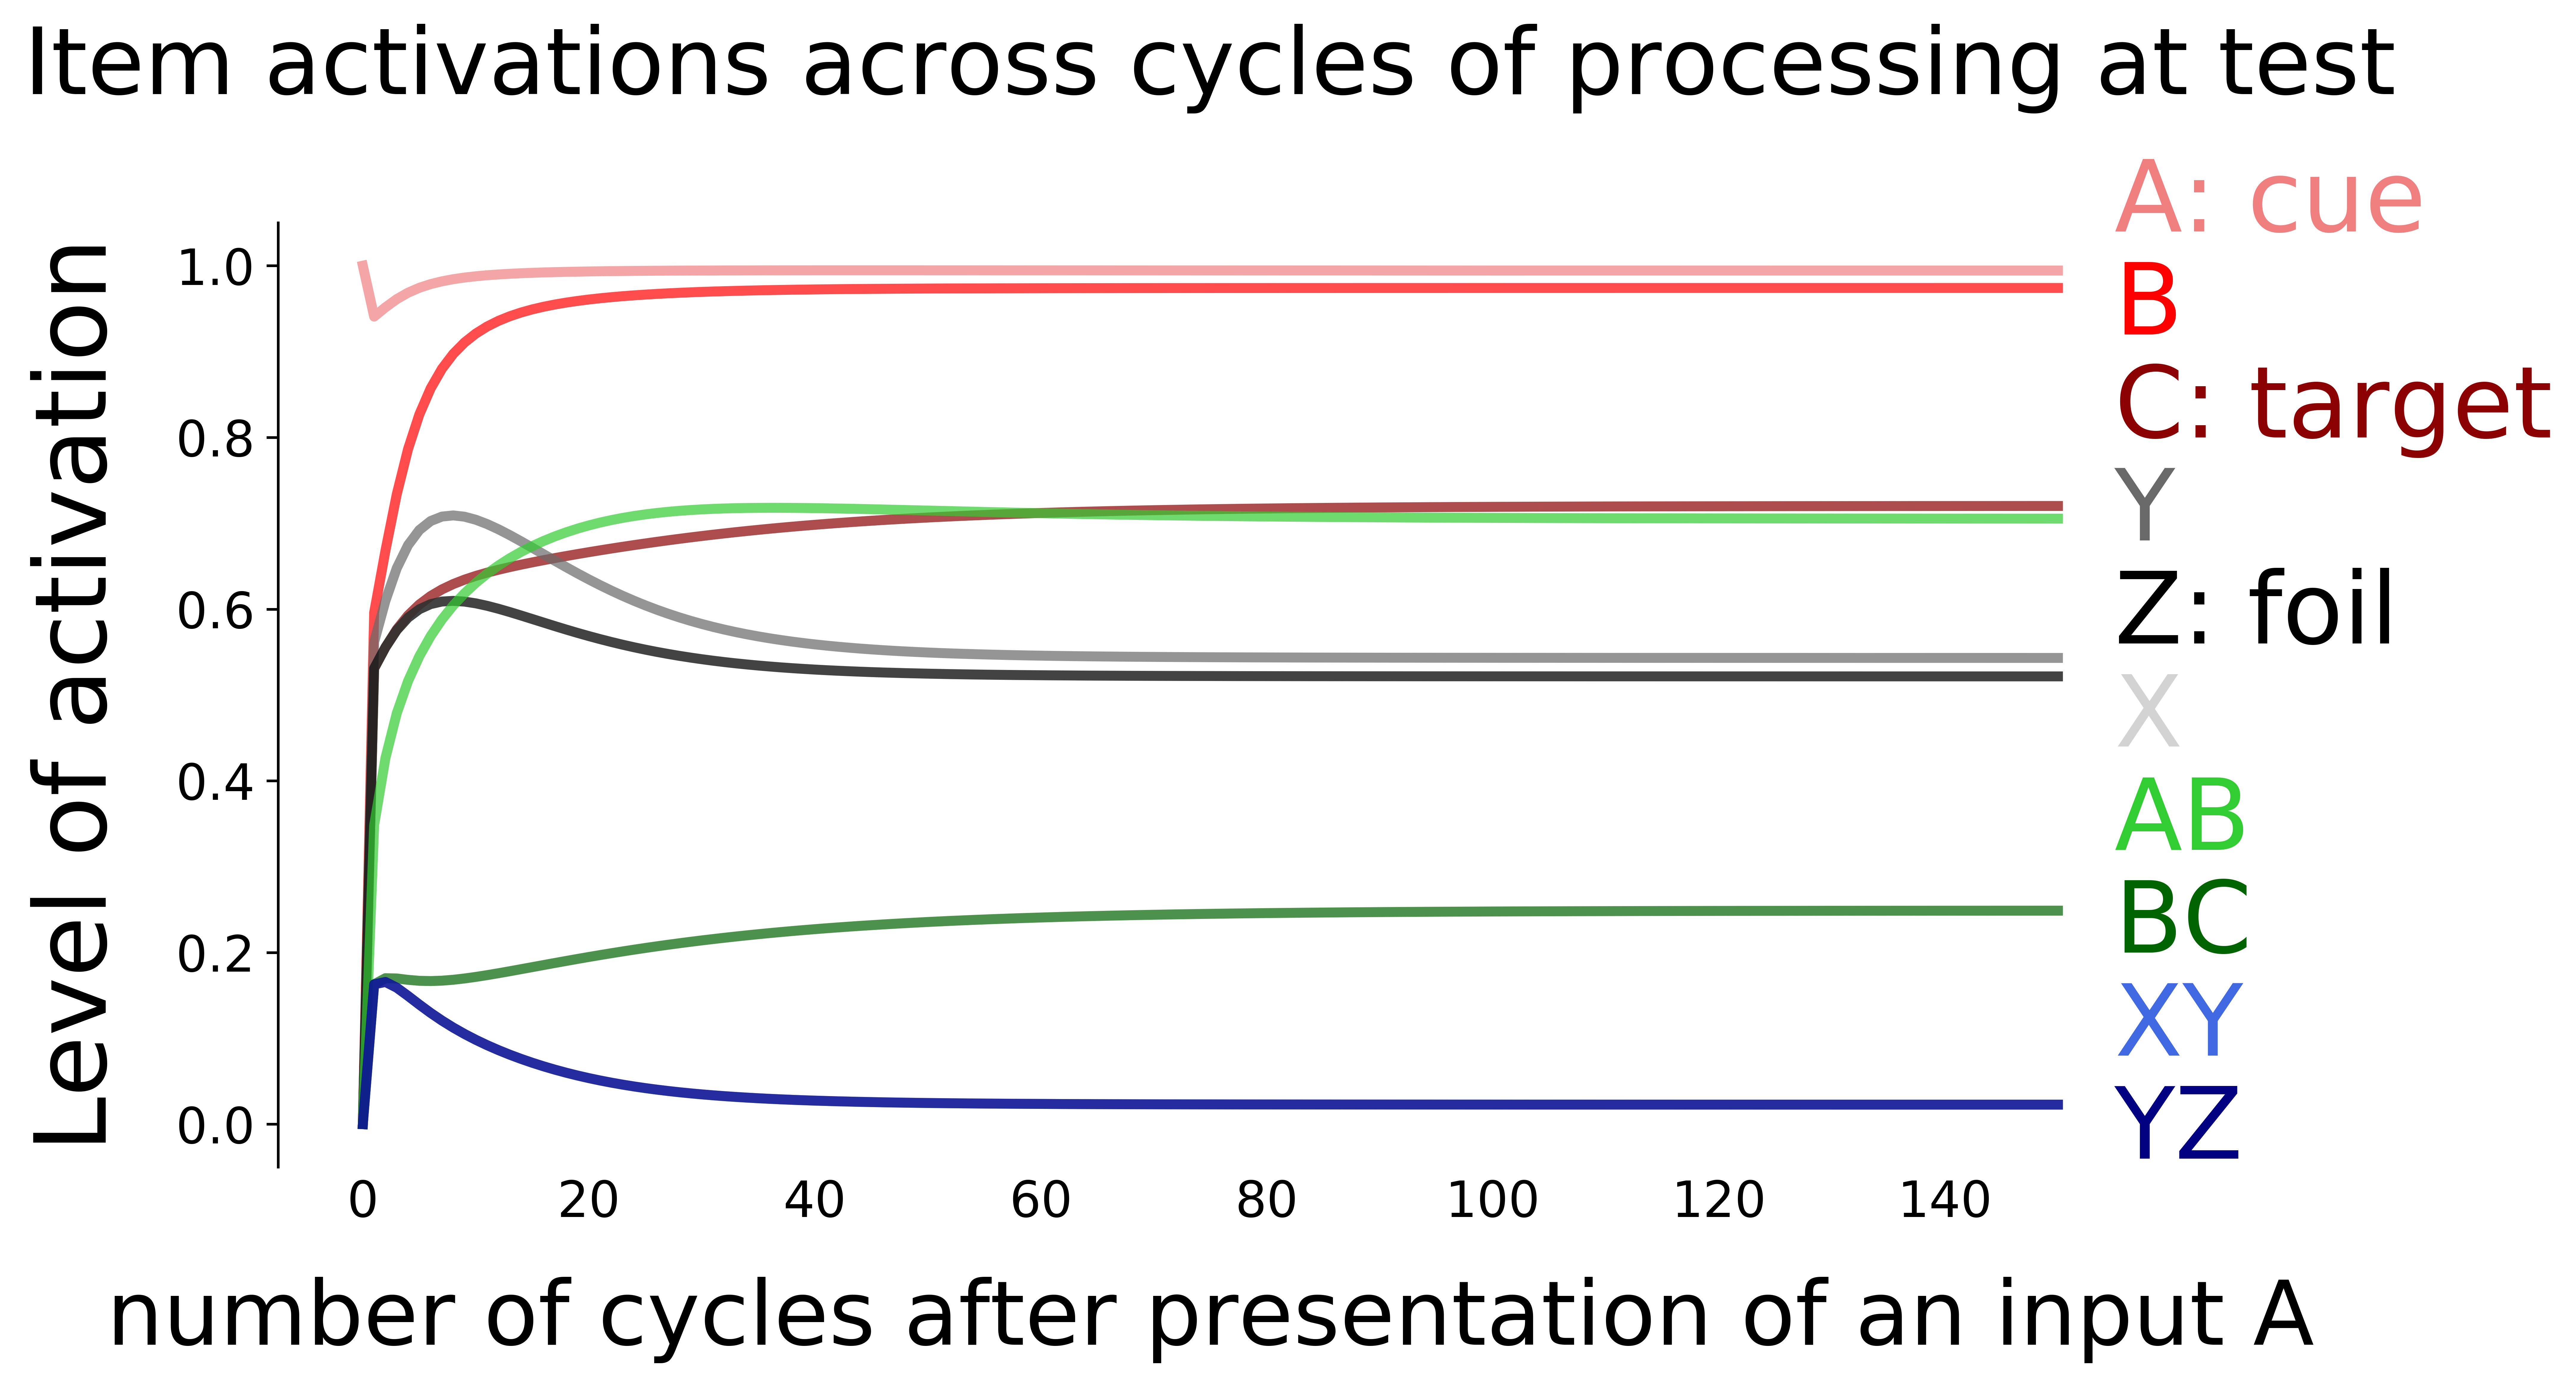

In [4]:
import matplotlib.pyplot as plt

plt.figure(dpi=800, figsize=(11, 6))

plt.plot(cycles, a, alpha=0.7, linewidth=3, color='lightcoral')
plt.plot(cycles, b, alpha=0.7, linewidth=3, color='red')
plt.plot(cycles, c, alpha=0.7, linewidth=3, color='darkred')
plt.plot(cycles, x, alpha=0.7, linewidth=3, color='lightgray')
plt.plot(cycles, y, alpha=0.7, linewidth=3, color='dimgray')
plt.plot(cycles, z, alpha=0.7, linewidth=3, color='black')

plt.plot(cycles, ab, alpha=0.7, linewidth=3, color="limegreen")
plt.plot(cycles, bc, alpha=0.7, linewidth=3, color="darkgreen")
plt.plot(cycles, xy, alpha=0.7, linewidth=3, color="royalblue")
plt.plot(cycles, yz, alpha=0.7, linewidth=3, color="navy")

x_pos = 155

plt.text(x_pos, 1.04, "A: cue", color="lightcoral", fontsize=30)
plt.text(x_pos, 0.92, "B", color="red", fontsize=30)
plt.text(x_pos, 0.80, "C: target", color="darkred", fontsize=30)
plt.text(x_pos, 0.68, "Y", color="dimgray", fontsize=30)
plt.text(x_pos, 0.56, "Z: foil", color="black", fontsize=30)
plt.text(x_pos, 0.44, "X", color="lightgray", fontsize=30)
plt.text(x_pos, 0.32, "AB", color="limegreen", fontsize=30)
plt.text(x_pos, 0.20, "BC", color="darkgreen", fontsize=30)
plt.text(x_pos, 0.08, "XY", color="royalblue", fontsize=30)
plt.text(x_pos, -0.04, "YZ", color="navy", fontsize=30)


plt.ylabel("Level of activation", labelpad=15, fontsize=30)
plt.xlabel("number of cycles after presentation of an input A", labelpad=15, fontsize=27)
plt.text(-30, 1.2, "Item activations across cycles of processing at test", color="k", fontsize=28)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', length=0, labelsize=15)

plt.tight_layout()

plt.show()

# TCM (Howard & Kahana 2002; Howard et al., 2009)
### Howard, M. W., & Kahana, M. J. (2002). A distributed representation of temporal context. Journal of Mathematical Psychology, 46(3), 269-299.
### Howard, M. W., Jing, B., Rao, V. A., Provyn, J. P., & Datey, A. V. (2009). Bridging the gap: Transitive associations between items presented in similar temporal contexts. Journal of Experimental Psychology: Learning, Memory, and Cognition, 35(2), 391.

In [5]:
def adjacentInvalid(first, second):
    if first[1] == second[1]:
        return True
    else:
        return False

In [6]:
def Norm_vec(vec):
    norm = np.linalg.norm(vec)
    if norm == 0: 
        return vec
    return vec / norm

In [7]:
def generateTrainingData(repeats):
    import copy
    
    training_data = {}
    
    obj_IDs = [i+1 for i in range(18)]
    random.shuffle(obj_IDs)
    interleaved_ABCs = [obj_IDs[i*3:i*3+3] for i in range(3)]
    blocked_ABCs = [obj_IDs[i*3:i*3+3] for i in range(3, 6)]
    
    interleaved_pairs = [[[ABC[0], ABC[1]], [ABC[1], ABC[2]]] for ABC in interleaved_ABCs]
    blocked_pairs = [[[ABC[0], ABC[1]], [ABC[1], ABC[2]]] for ABC in blocked_ABCs]
    
    training_data = {"interleaved_ABCs": interleaved_ABCs,
                 "blocked_ABCs": blocked_ABCs,
                 "interleaved_pairs": interleaved_pairs,
                 "blocked_pairs": blocked_pairs}
    
    interleaved_sequence = []
    blocked_sequence = []
    
    # first add ABs
    for i in range(len(blocked_ABCs)):
        for j in range(repeats):
            AB = "b" + str(i) + "1"
            blocked_sequence.append(AB)
    random.shuffle(blocked_sequence)
    
            
    # then add BCs
    for i in range(len(blocked_ABCs)):
        lower = 0.06
        for j in range(len(blocked_sequence)):
            if blocked_sequence[len(blocked_sequence)-1-j][1] == str(i):
                lower = len(blocked_sequence)-1-j + 1
                break
        for k in range(repeats):
            index = random.randint(lower, len(blocked_sequence))
            BC = "b" + str(i) + "2"
            blocked_sequence.insert(index, BC)
    #print(len(blocked_sequence))
    for i, ABC in enumerate(blocked_ABCs):
        first_BC = None
        # find the first BC 
        for j, trial in enumerate(blocked_sequence):
            if trial == "b" + str(i) + "2":
                first_BC = j
                break
        
        # then check all AB
        counter = 0
        for j, trial in enumerate(blocked_sequence):
            if trial == "b" + str(i) + "1":
                counter += 1
                if counter > first_BC:
                    print("ERROR: Invalid sequence")
        if counter != repeats:
            print("ERROR: Invalid sequence")
    
    
    # now make sure that adjacent pairs are not the same / from the same category
    not_sorted = True
    while(not_sorted):
        
        for i in range(len(blocked_sequence)-1):
            cur = blocked_sequence[i]
            nex = copy.copy(blocked_sequence[i+1])
            
            if cur[1] == nex[1]:
                if nex[2] == "1":
                    lower = i+2
                    upper = None
                    for j in range(len(blocked_sequence)):
                        if blocked_sequence[j][1] == nex[1] and blocked_sequence[j][2] == "2":
                            upper = j-2
                            break
                    found_partner = False
                    counter = 0
                    if lower >= upper - 1:
                        return []
                    partner_i = random.randint(lower, upper)
                    partner = copy.copy(blocked_sequence[partner_i])
                    while (not found_partner):
                        counter += 1
                        if counter > 200:
                            return []
                        if partner[2] == "2":
                            continue
                        if adjacentInvalid(cur, partner) or adjacentInvalid(partner, blocked_sequence[i+2]) or adjacentInvalid(blocked_sequence[partner_i-1], nex) or adjacentInvalid(nex, blocked_sequence[partner_i+1]):
                            partner_i = random.randint(lower, upper)
                            partner = copy.copy(blocked_sequence[partner_i])
                            continue
                        else:
                            found_partner = True
                    new_sequence = copy.copy(blocked_sequence)
                    new_sequence[i+1] = partner
                    new_sequence[partner_i] = nex
                    blocked_sequence = new_sequence
                elif nex[2] == "2":
                    lower = i+2
                    upper = len(blocked_sequence) - 2
                    if lower >= upper - 1:
                        return []
                    found_partner = False
                    counter = 0
                    partner_i = random.randint(lower, upper)
                    partner = copy.copy(blocked_sequence[partner_i])
                    while (not found_partner):
                        counter += 1
                        bad_partner = False
                        if counter > 200:
                            return []
                        if partner[2] == "2":
                            for j in range(len(blocked_sequence)):
                                if blocked_sequence[j][1] == partner[1] and blocked_sequence[j][2] == "1":
                                    if i+1 <= j:
                                        bad_partner = True
                        if bad_partner:
                            continue
                        if adjacentInvalid(cur, partner) or adjacentInvalid(partner, blocked_sequence[i+2]) or adjacentInvalid(blocked_sequence[partner_i-1], nex) or adjacentInvalid(nex, blocked_sequence[partner_i+1]):
                            partner_i = random.randint(lower, upper)
                            partner = copy.copy(blocked_sequence[partner_i])
                            continue
                        else:
                            found_partner = True
                    blocked_sequence[i+1] = partner
                    blocked_sequence[partner_i] = nex
        not_sorted = False

    # first add ABs
    for i in range(len(interleaved_ABCs)):
        for j in range(repeats):
            AB = "i" + str(i) + "1"
            interleaved_sequence.append(AB)
    for i in range(3):
        random.shuffle(interleaved_sequence)
    
    # then add BCs
    for i in range(len(interleaved_ABCs)):
        AB_indices = []
        for AB_i, AB in enumerate(interleaved_sequence):
            if AB[1] == str(i):
                AB_indices.append(AB_i)
        AB_indices.append(len(interleaved_sequence))
        BC = "i" + str(i) + "2"
        counter = 0
        for j in range(len(AB_indices)-1):
            insert_i = random.randint(AB_indices[j]+1, AB_indices[j+1])
            interleaved_sequence.insert(insert_i+counter, BC)
            counter += 1
    tag_indices = []
    
    for i in range(len(interleaved_sequence)-1):
        if interleaved_sequence[i][1] == interleaved_sequence[i+1][1]:
            tag_indices.append(i+1)
    
    full_sequence = interleaved_sequence
    for num_tagged, tag_index in enumerate(tag_indices):
        full_sequence.insert(tag_index + num_tagged, "blocked")
        
    while len(full_sequence) != repeats * 12:
        full_sequence.insert(random.randint(0, len(full_sequence)), "blocked")
    
    blocked_i = 0
    for i in range(len(full_sequence)):
        if full_sequence[i] == "blocked":
            full_sequence[i] = blocked_sequence[blocked_i]
            blocked_i += 1
    
    sequence_data = []
    for i in range(len(full_sequence)):
        current_pair = np.zeros(len(obj_IDs))
        tag = full_sequence[i]
        if tag[0] == "b":
            pair = blocked_pairs[int(tag[1])][int(tag[2])-1]
            current_pair[pair[0]-1] = 1.0
            current_pair[pair[1]-1] = 1.0
        if tag[0] == "i":
            pair = interleaved_pairs[int(tag[1])][int(tag[2])-1]
            current_pair[pair[0]-1] = 1.0
            current_pair[pair[1]-1] = 1.0
        sequence_data.append(current_pair)
    sequence_data = np.asarray(sequence_data)
    
    training_data["data"] = sequence_data
    return training_data

In [16]:
vec_size = 18

num_of_repeats = 30
data = generateTrainingData(num_of_repeats)
while(len(data) == 0):
    data = generateTrainingData(num_of_repeats)
    
# initializations 
gamma_fc = 0.0
gamma_cf = 0.0
gamma = 0.1
h_in_ratio = 0.9
beta_enc = 0.7 # rate of context drift during encoding
beta_rec = 1.0 # rate of context drift during recall
beta_noise = 0.99 # rate of context drift in between trials
cf_rate = 1

In [20]:
final_I_AC = []
final_I_AC_foil = []

final_I_CA = []
final_I_CA_foil = []

final_B_AC = []
final_B_AC_foil = []

final_B_CA = []
final_B_CA_foil = []

all_I_AC_curve = []
all_I_AC_foil_curve = []

all_I_CA_curve = []
all_I_CA_foil_curve = []

all_B_AC_curve = []
all_B_AC_foil_curve = []

all_B_CA_curve = []
all_B_CA_foil_curve = []

# for each model
for m in range(100):
    
    # initialize context-to-feature and feature-to-context associations
    M_cf = np.identity(vec_size)*(1-gamma_cf)
    M_fc = np.identity(vec_size)*(1-gamma_fc)
    
    # experimental context initialized as zero vector
    t = np.zeros((1,vec_size))

    # track the number of times an object is presented
    objs_count = {}
    
    # each object has an associated h vector that is a recency-weighted average of its past contexts
    objs_h = {}
    
    
    I_AC_curve = []
    I_AC_foil_curve = []
    
    I_CA_curve = []
    I_CA_foil_curve = []
    
    B_AC_curve = []
    B_AC_foil_curve = []
    
    B_CA_curve = []
    B_CA_foil_curve = []
    
    item_update_timesteps = []
    
    timesteps = []
    
    # initialize objs_count and objs_h
    for i in range(vec_size):
        objs_count[i] = 0.0
        objs_h[i] = np.zeros(vec_size)

    # for each trial
    for i in range(len(data['data'])):

        # objects to be shown in this trial
        current_pair = data['data'][i]

        # present objectsin a randomized order
        labels = []
        for pair_i in range(len(current_pair)):
            if current_pair[pair_i] == 1:
                labels.append(pair_i)
        random.shuffle(labels)
    
        # encode object 1
        f_item1 = np.zeros([1, vec_size], dtype=np.float32)
        f_item1[0][labels[0]] = 1.0

        coeff = None

        if objs_count[labels[0]] > 0.0:
            coeff = h_in_ratio
            t_temp = np.reshape(np.asarray(copy.copy(t)), vec_size)
            h_in1 = objs_h[labels[0]]
            new_h_in = []
            for k in range(len(h_in1)):
                new_h_in.append(h_in1[k] + t_temp[k])
            h_in1 = Norm_vec(np.asarray(new_h_in))
            objs_h[labels[0]] = h_in1
        elif objs_count[labels[0]] == 0.0:
            coeff = 0.0
            t_temp = np.reshape(np.asarray(copy.copy(t)), vec_size)
            h_in1 = objs_h[labels[0]]
            new_h_in = []
            for k in range(len(h_in1)):
                new_h_in.append(h_in1[k] + t_temp[k])
            h_in1 = Norm_vec(np.asarray(new_h_in))
            objs_h[labels[0]] = h_in1
            
            
        c_in1 = np.asarray(np.reshape(copy.copy(f_item1), vec_size))
        vec1 = []
        
        for ci in range(len(c_in1)):
            vec1.append((1-coeff)*c_in1[ci] + coeff*h_in1[ci])
            
        t_in1 = np.reshape(vec1, [vec_size, 1])

        t_in1 = np.transpose(t_in1)
        t_in1 = Norm_vec(t_in1)

        t_tin1=np.inner(t_in1,t)
        ro1 = (1+beta_enc**2*(t_tin1**2-1))**0.5 - beta_enc*(t_tin1)
        
        t = ro1*t + beta_enc*t_in1
        t = Norm_vec(t)

        M_cf = M_cf + cf_rate * np.dot(np.transpose(f_item1),t)

        P = np.dot(np.transpose(f_item1),f_item1)/np.linalg.norm(f_item1)**2
        B = 1/(gamma**2 + 2*gamma*np.inner(t_in1, t) + 1)
        A = gamma * B
        M_fc = M_fc*(1-P) + A*M_fc*P + B*np.dot(np.transpose(t),f_item1)
        

        objs_count[labels[0]] += 1.0
        
        # encode object 2
        f_item2 = np.zeros([1, vec_size], dtype=np.float32)
        f_item2[0][labels[1]] = 1.0

        coeff = None

        if objs_count[labels[1]] > 0.0:
            coeff = h_in_ratio
            t_temp = np.reshape(np.asarray(copy.copy(t)), vec_size)
            h_in2 = objs_h[labels[1]]
            new_h_in = []
            for k in range(len(h_in2)):
                new_h_in.append(h_in2[k] + t_temp[k])
            h_in2 = Norm_vec(np.asarray(new_h_in))
            objs_h[labels[1]] = h_in2
        elif objs_count[labels[1]] == 0.0:
            coeff = 0.0
            t_temp = np.reshape(np.asarray(copy.copy(t)), vec_size)
            h_in2 = objs_h[labels[1]]
            new_h_in = []
            for k in range(len(h_in2)):
                new_h_in.append(h_in2[k] + t_temp[k])
            h_in2 = Norm_vec(np.asarray(new_h_in))
            objs_h[labels[1]] = h_in2

        c_in2 = np.asarray(np.reshape(copy.copy(f_item2), vec_size))

        vec2 = []
        for ci in range(len(c_in2)):
            vec2.append((1-coeff)*c_in2[ci] + coeff*h_in2[ci])
            
        t_in2 = np.reshape(vec2, [vec_size, 1])

        t_in2 = np.transpose(t_in2)
        t_in2 = Norm_vec(t_in2)

        t_tin2=np.inner(t_in2,t)
        ro2 = (1+beta_enc**2*(t_tin2**2-1))**0.5 - beta_enc*(t_tin2)
        
        t = ro2*t + beta_enc*t_in2
        t = Norm_vec(t)

        M_cf = M_cf + cf_rate * np.dot(np.transpose(f_item2),t)

        P = np.dot(np.transpose(f_item2),f_item2)/np.linalg.norm(f_item2)**2
        B = 1/(gamma**2 + 2*gamma*np.inner(t_in2, t) + 1)
        A = gamma * B
        M_fc = M_fc*(1-P) + A*M_fc*P + B*np.dot(np.transpose(t),f_item2)

        objs_count[labels[1]] += 1.0

        t_temp = copy.copy(np.asarray(t))
        t_temp = t_temp.reshape(vec_size)
        distractor = np.random.randn(vec_size)
        distractor -= distractor.dot(t_temp) * t_temp 
        distractor /= np.linalg.norm(distractor)
        distractor = Norm_vec(distractor)
        distractor = np.reshape(distractor, (1, vec_size))
        t_tin = np.inner(distractor,t)
        ro_noise = (1+beta_noise**2*(t_tin**2-1))**0.5 - beta_noise*(t_tin)
        t = ro_noise*t + beta_noise*distractor
        t = Norm_vec(t)

        I_AC = []
        I_AC_foil = []
        
        I_CA = []
        I_CA_foil = []
        
        foil = [2, 0, 1]

        # probe how much items activate transively- vs. non- related items via learned associations
        for index, triad in enumerate(data['interleaved_ABCs']):
            
            A = np.zeros([1, vec_size], dtype=np.float32)
            A[0][triad[0]-1] = 1.0

            C = np.zeros([1, vec_size], dtype=np.float32)
            C[0][triad[2]-1] = 1.0

            A_foil = np.zeros([1, vec_size], dtype=np.float32)
            A_foil[0][data['interleaved_ABCs'][foil[index]][0]-1] = 1.0

            C_foil = np.zeros([1, vec_size], dtype=np.float32)
            C_foil[0][data['interleaved_ABCs'][foil[index]][2]-1] = 1.0
            
            A_t = np.reshape(np.dot(M_fc, np.transpose(A)), (1,vec_size))
            A_t = Norm_vec(A_t)
            A_t = np.reshape(A_t, (1, vec_size))
            A_f = np.dot(M_cf, A_t.T).reshape(vec_size)

            A_foil_t = np.reshape(np.dot(M_fc, np.transpose(A_foil)), (1,vec_size))
            A_foil_t = Norm_vec(A_foil_t)
            A_foil_t = np.reshape(A_foil_t, (1, vec_size))
            A_foil_f = np.dot(M_cf, A_foil_t.T).reshape(vec_size)

            C_t = np.reshape(np.dot(M_fc, np.transpose(C)), (1,vec_size))
            C_t = Norm_vec(C_t)
            C_t = np.reshape(C_t, (1, vec_size))
            C_f = np.dot(M_cf, C_t.T).reshape(vec_size)

            C_foil_t = np.reshape(np.dot(M_fc, np.transpose(C_foil)), (1,vec_size))
            C_foil_t = Norm_vec(C_foil_t)
            C_foil_t = np.reshape(C_foil_t, (1, vec_size))
            C_foil_f = np.dot(M_cf, C_foil_t.T).reshape(vec_size)

            AC = A_f[triad[2]-1] 
            AC_foil = A_foil_f[triad[2]-1]

            CA = C_f[triad[0]-1]
            CA_foil = C_foil_f[triad[0]-1]  

            I_AC.append(AC)
            I_AC_foil.append(AC_foil)

            I_CA.append(CA)
            I_CA_foil.append(CA_foil)

        I_AC_curve.append(np.mean(I_AC))
        I_AC_foil_curve.append(np.mean(I_AC_foil))
        
        I_CA_curve.append(np.mean(I_CA))
        I_CA_foil_curve.append(np.mean(I_CA_foil))
        
        B_AC = []
        B_AC_foil = []
        
        B_CA = []
        B_CA_foil = []
        
        foil = [2, 0, 1]

        for index, triad in enumerate(data['blocked_ABCs']):
            A = np.zeros([1, vec_size], dtype=np.float32)
            A[0][triad[0]-1] = 1.0

            B = np.zeros([1, vec_size], dtype=np.float32)
            B[0][triad[1]-1] = 1.0

            C = np.zeros([1, vec_size], dtype=np.float32)
            C[0][triad[2]-1] = 1.0

            A_foil = np.zeros([1, vec_size], dtype=np.float32)
            A_foil[0][data['blocked_ABCs'][foil[index]][0]-1] = 1.0

            C_foil = np.zeros([1, vec_size], dtype=np.float32)
            C_foil[0][data['blocked_ABCs'][foil[index]][2]-1] = 1.0

            A_t = np.reshape(np.dot(M_fc, np.transpose(A)), (1,vec_size))
            A_t = Norm_vec(A_t)
            A_t = np.reshape(A_t, (1, vec_size))
            A_f = np.dot(M_cf, A_t.T).reshape(vec_size)

            A_foil_t = np.reshape(np.dot(M_fc, np.transpose(A_foil)), (1,vec_size))
            A_foil_t = Norm_vec(A_foil_t)
            A_foil_t = np.reshape(A_foil_t, (1, vec_size))
            A_foil_f = np.dot(M_cf, A_foil_t.T).reshape(vec_size)

            C_t = np.reshape(np.dot(M_fc, np.transpose(C)), (1,vec_size))
            C_t = Norm_vec(C_t)
            C_t = np.reshape(C_t, (1, vec_size))
            C_f = np.dot(M_cf, C_t.T).reshape(vec_size)

            C_foil_t = np.reshape(np.dot(M_fc, np.transpose(C_foil)), (1,vec_size))
            C_foil_t = Norm_vec(C_foil_t)
            C_foil_t = np.reshape(C_foil_t, (1, vec_size))
            C_foil_f = np.dot(M_cf, C_foil_t.T).reshape(vec_size)

            AC = A_f[triad[2]-1] 
            AC_foil = A_foil_f[triad[2]-1]

            CA = C_f[triad[0]-1]
            CA_foil = C_foil_f[triad[0]-1]

            B_AC.append(AC)
            B_AC_foil.append(AC_foil)

            B_CA.append(CA)
            B_CA_foil.append(CA_foil)

        B_AC_curve.append(np.mean(B_AC))
        B_AC_foil_curve.append(np.mean(B_AC_foil))
        
        B_CA_curve.append(np.mean(B_CA))
        B_CA_foil_curve.append(np.mean(B_CA_foil))
        
        timesteps.append(i)
    
    all_I_AC_curve.append(I_AC_curve)
    all_I_AC_foil_curve.append(I_AC_foil_curve)
    all_I_CA_curve.append(I_CA_curve)
    all_I_CA_foil_curve.append(I_CA_foil_curve)
    
    all_B_AC_curve.append(B_AC_curve)
    all_B_AC_foil_curve.append(B_AC_foil_curve)
    all_B_CA_curve.append(B_CA_curve)
    all_B_CA_foil_curve.append(B_CA_foil_curve)
    
    
    final_I_AC.append(I_AC_curve[-1])
    final_I_AC_foil.append(I_AC_foil_curve[-1])
    final_I_CA.append(I_CA_curve[-1])
    final_I_CA_foil.append(I_CA_foil_curve[-1])
    
    final_B_AC.append(B_AC_curve[-1])
    final_B_AC_foil.append(B_AC_foil_curve[-1])
    final_B_CA.append(B_CA_curve[-1])
    final_B_CA_foil.append(B_CA_foil_curve[-1])

In [21]:
all_I_AC_mean = []
all_I_AC_foil_mean = []

all_I_CA_mean = []
all_I_CA_foil_mean = []

all_B_AC_mean = []
all_B_AC_foil_mean = []

all_B_CA_mean = []
all_B_CA_foil_mean = []

for timestep in range(len(timesteps)):
    
    I_AC = []
    I_AC_foil = []
    
    I_CA = []
    I_CA_foil = []
    
    B_AC = []
    B_AC_foil = []
    
    B_CA = []
    B_CA_foil = []
    
    
    for m_i in range(len(all_B_AC_curve)):
        I_AC.append(all_I_AC_curve[m_i][timestep])
        I_AC_foil.append(all_I_AC_foil_curve[m_i][timestep])
        
        I_CA.append(all_I_CA_curve[m_i][timestep])
        I_CA_foil.append(all_I_CA_foil_curve[m_i][timestep])
        
        B_AC.append(all_B_AC_curve[m_i][timestep])
        B_AC_foil.append(all_B_AC_foil_curve[m_i][timestep])
        
        B_CA.append(all_B_CA_curve[m_i][timestep])
        B_CA_foil.append(all_B_CA_foil_curve[m_i][timestep])
    
    all_I_AC_mean.append(np.mean(I_AC))
    all_I_AC_foil_mean.append(np.mean(I_AC_foil))
    
    all_I_CA_mean.append(np.mean(I_CA))
    all_I_CA_foil_mean.append(np.mean(I_CA_foil))
    
    all_B_AC_mean.append(np.mean(B_AC))
    all_B_AC_foil_mean.append(np.mean(B_AC_foil))
    
    all_B_CA_mean.append(np.mean(B_CA))
    all_B_CA_foil_mean.append(np.mean(B_CA_foil))

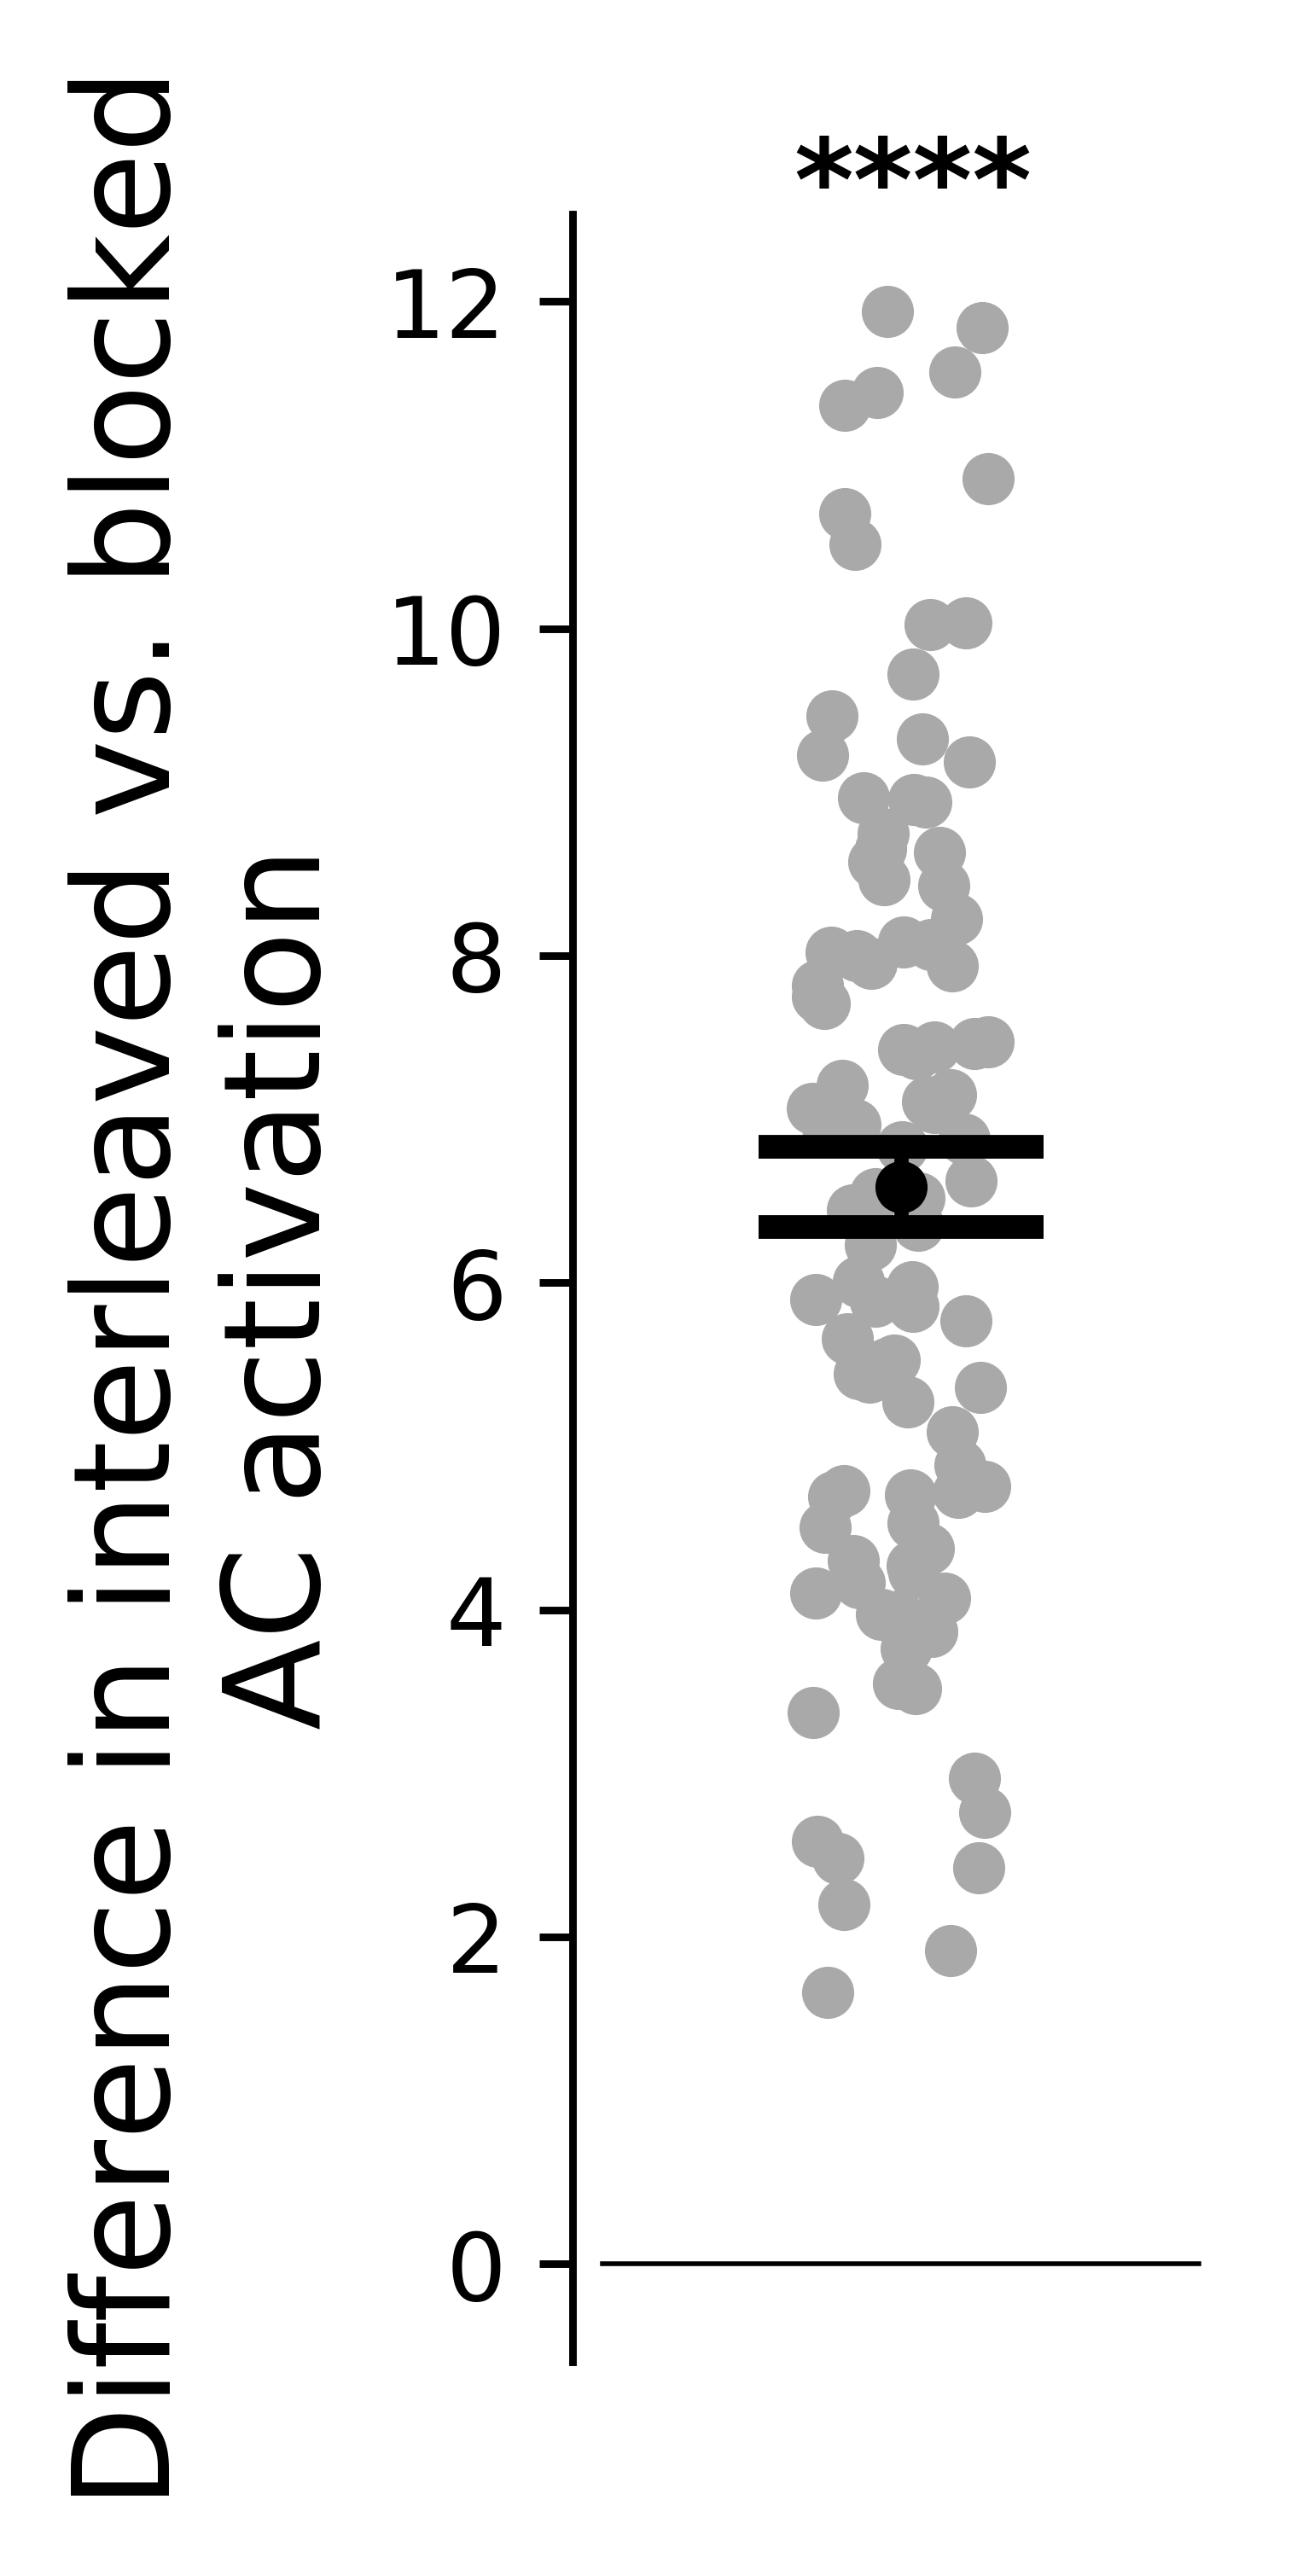

In [25]:
# visualize results: interleaved vs. blocked differences across models

plt.figure(dpi=800, figsize=(2,4))

difference = []

for i in range(len(final_I_AC)):
    difference.append((final_I_AC[i] + final_I_CA[i] - final_B_AC[i] - final_B_CA[i])/2.0)

# Create lists for the plot
types = ['']
x_pos = [0.6]

x = np.linspace(0.575,0.625,1000)
y = 0*x

for i in range(len(difference)):
    subject_data = [difference[i]]
    pos = [(np.random.rand()-0.5)*0.015 + x_pos[0]]
    plt.plot(pos, subject_data, 'o-', markersize=4.5, color='darkgray', zorder=0)
    
    
plt.plot(x, y, 'k', linewidth=0.5)

plt.errorbar([x_pos[0]], [np.mean(difference)], yerr=[np.std(difference)/(len(difference)**0.5)], color='k', capsize=15, capthick=2.5, zorder=100)
plt.plot([x_pos[0]], np.mean(difference), 'o-', markersize=4.5, color='k')

plt.ylabel('Difference in interleaved vs. blocked\nAC activation', fontsize=14) 
plt.xticks(x_pos, [""], fontsize=12, linespacing = 1.5, weight='bold')

plt.text(.591, 12.5, "****", color="k", fontsize=12, weight="bold")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tick_params(axis='x', length=0)

plt.tight_layout()
plt.savefig('TCM interleaved - blocked differences.pdf', dpi=800)#

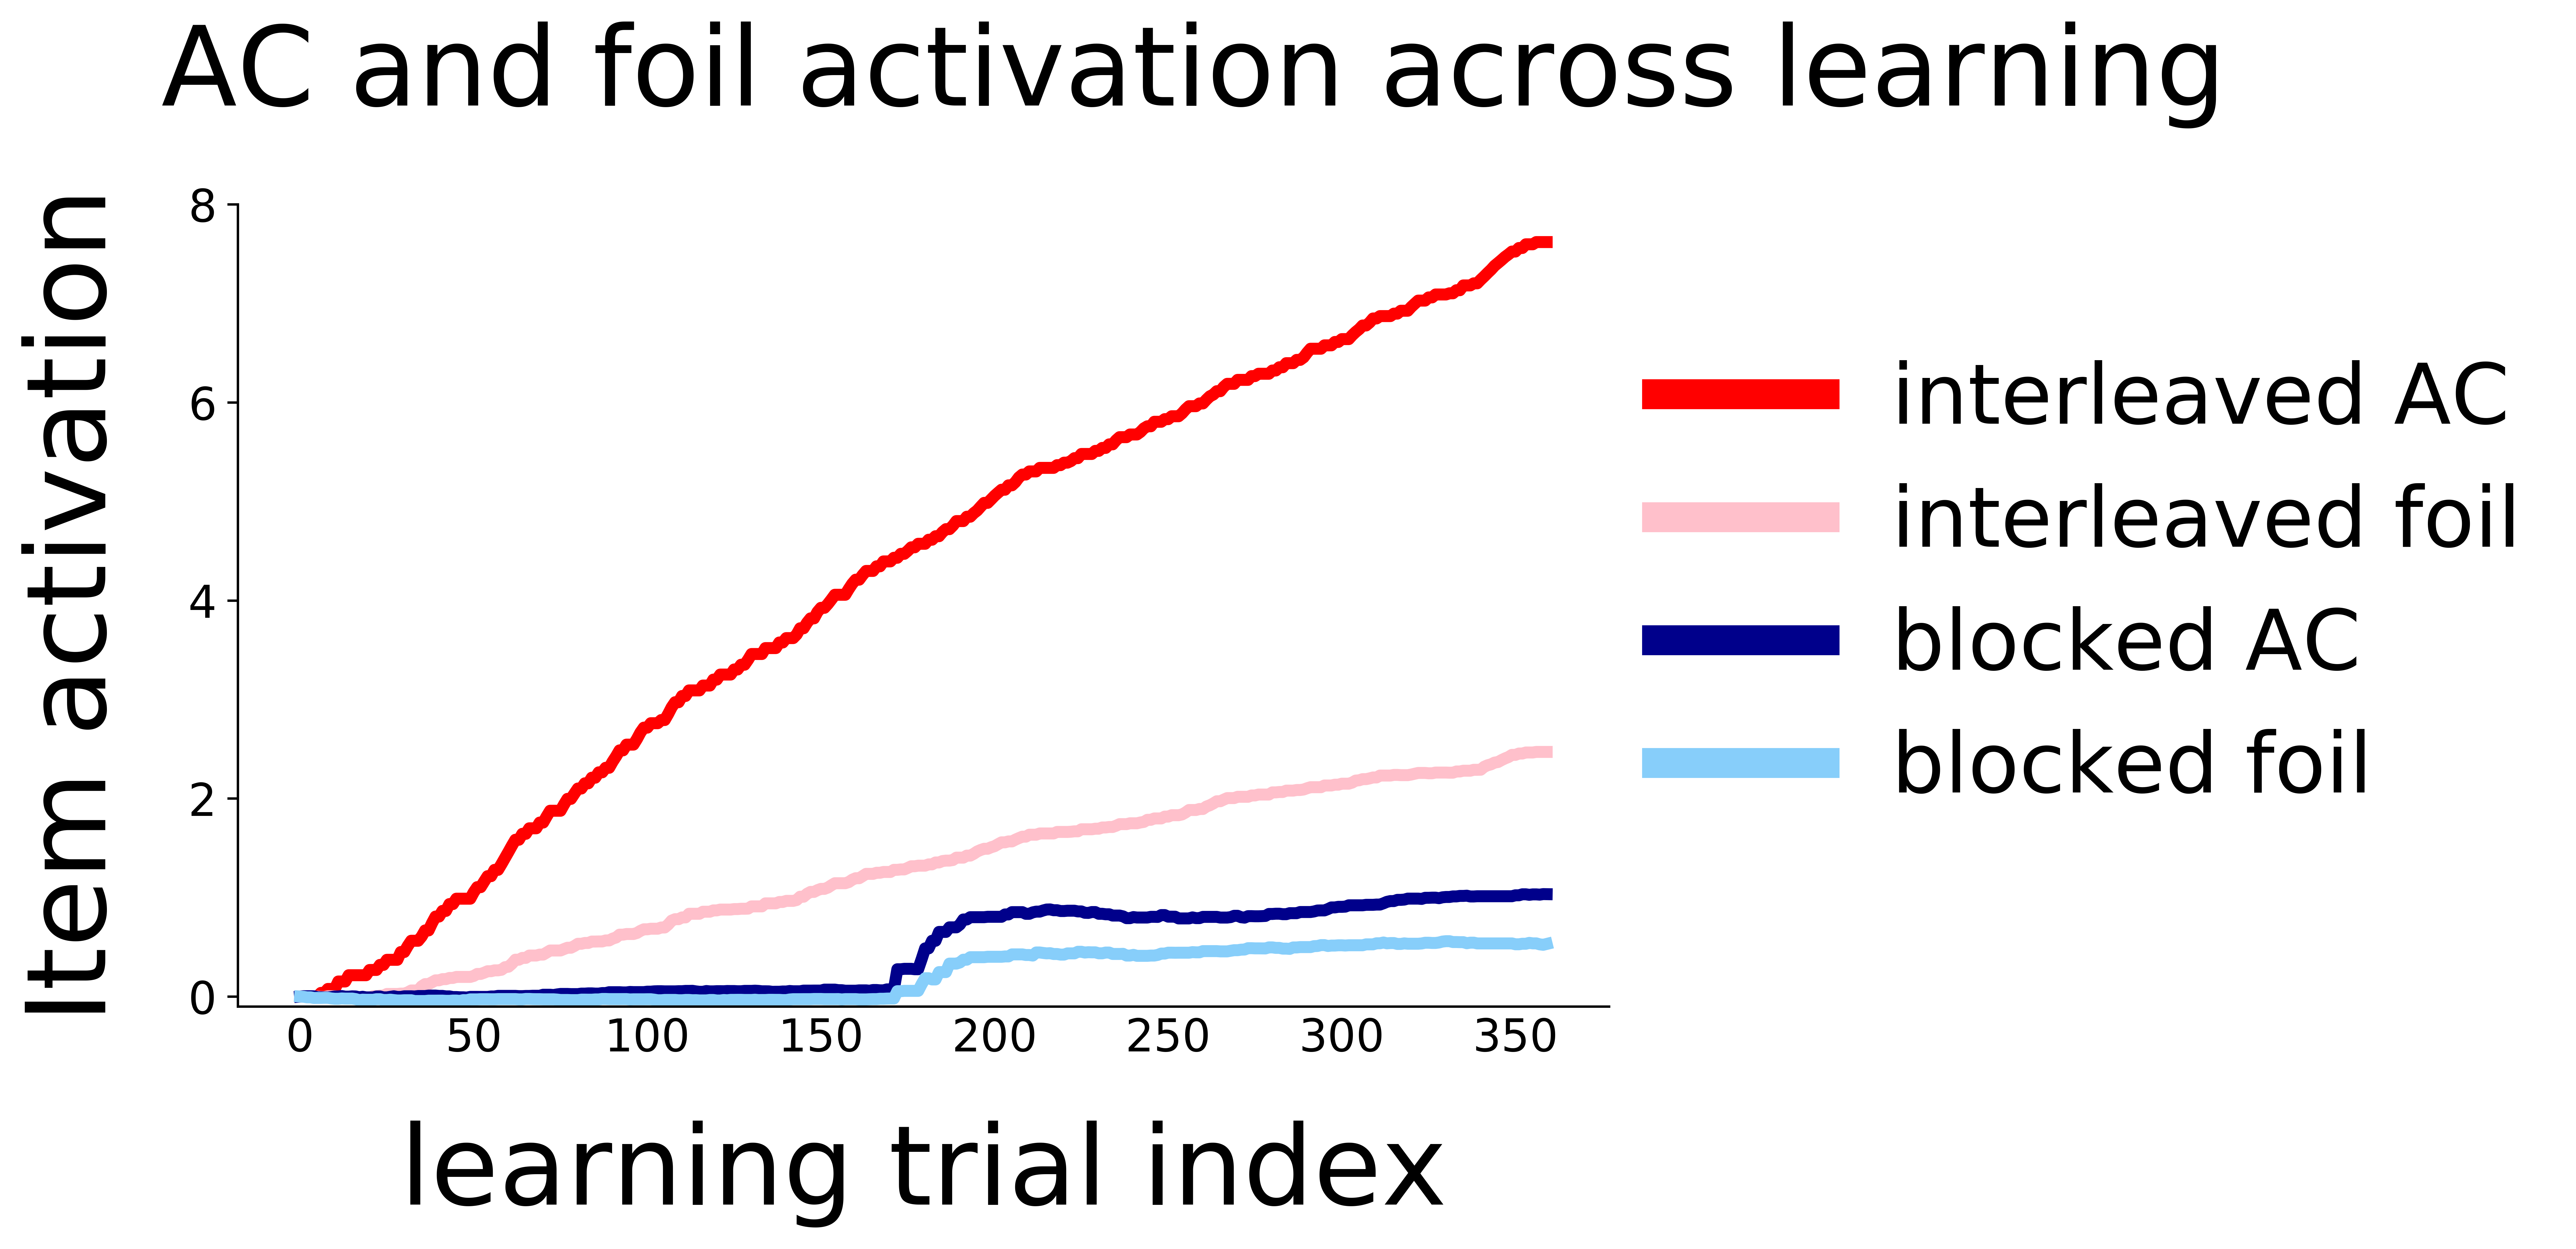

In [26]:
# visualize results: item co-activations through learning

plt.figure(dpi=800, figsize=(12, 6))

I_AC_collapsed = []
I_AC_foil_collapsed = []

B_AC_collapsed = []
B_AC_foil_collapsed = []

for i in range(len(all_I_CA_mean)):
    I_AC_collapsed.append((all_I_CA_mean[i] + all_I_AC_mean[i])/2.0)
    I_AC_foil_collapsed.append((all_I_CA_foil_mean[i] + all_I_AC_foil_mean[i])/2.0)
    
    B_AC_collapsed.append((all_B_CA_mean[i] + all_B_AC_mean[i])/2.0)
    B_AC_foil_collapsed.append((all_B_CA_foil_mean[i] + all_B_AC_foil_mean[i])/2.0)
    

plt.plot(timesteps, I_AC_collapsed, label=r'interleaved AC', linewidth=4, color='r', zorder=0)
plt.plot(timesteps, I_AC_foil_collapsed, label=r'interleaved foil', linewidth=4,  color='pink', zorder=0)

plt.plot(timesteps, B_AC_collapsed, label=r'blocked AC', linewidth=4, color='darkblue', zorder=0)
plt.plot(timesteps, B_AC_foil_collapsed, label=r'blocked foil', linewidth=4, color='lightskyblue', zorder=0)


plt.ylim(-0.1, 8)

plt.tick_params(axis='x', length=0, labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.text(-40, 9, r'AC and foil activation across learning', color="k", fontsize=37)

# make a legend for both plots
leg = plt.legend(frameon=False, bbox_to_anchor=(0.98, 0.9), prop={'size':28})

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
    
plt.xlabel("learning trial index", fontsize=37, labelpad=20)
plt.ylabel("Item activation", fontsize=37, labelpad=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('TCM activation timecourse.pdf', dpi=800)#